# Python Codes for Kaggle Contest 'House Prices'
This Notebook is the Python codes for Kaggle contest <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques" target="_blank">House Prices</a>.

* Packages: Numpy, Pandas, Sklearn, H2O
* Model: Linear Regression with Grid Search
* Technology: Adversarial Selection of Validation Data

### Performance at Submission:
<img src="https://github.com/sherrisherry/Kaggle_Starters/blob/master/images/HousePrices.JPG" />

### My Reference:
* https://github.com/jphall663/GWU_data_mining/blob/master/03_regression/src/py_part_3_kaggle_starter.ipynb

### Summary:
* The focus of my work is to improve model performance by data preparation (imputation, binning, encoding, and validation selection).
* My model is a simplified version of the model in the reference. I only trained a Linear Regression with Grid Search by the whole train set. There isn't ensembling nor any algorithm to generate predictors.

### Files in House_Prices:
* prediction.csv: Submission to Kaggle
* preprocess.R: Preprocessing codes in R
* recipe.txt: The log file of the preprocessing program
* data.zip: The folder of data files

### The Preprocessed File:
* train.csv and test.csv are combined into data.csv
* I made sure no leakage between train and test data.
* The target variable is 'NA' in the test set.
* No missing value in predictors.
* Number of categorical predictors are reduced to 23.
* Ordinal columns are encoded to sequential integers.
* Binary columns are encoded to 0 and 1.
* The record of preprocessing is in House_Prices_log.txt.

In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

##### Exploring the dataset

In [2]:
data=pd.read_csv('House_Prices/data.csv')
data.sample(5)

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1640,1641,RL,80,11088,1,NoApp,Reg,Lvl,4,Inside,...,0,0,NoApp,NoApp,0,5,2009,WD,Normal,NaN
1760,1761,RL,115,10500,1,NoApp,IR1,Lvl,4,Inside,...,0,0,NoApp,NoApp,0,7,2009,COD,Abnorml,NaN
504,505,RL,24,2308,1,NoApp,Reg,Lvl,4,Inside,...,0,0,NoApp,NoApp,0,6,2009,WD,Normal,147000.0
2495,2496,RL,102,12671,1,NoApp,IR1,Lvl,4,Corner,...,0,0,NoApp,NoApp,0,7,2007,WD,Normal,NaN
1789,1790,RL,60,10800,1,Grvl,Reg,Lvl,4,Corner,...,0,0,NoApp,NoApp,0,11,2009,WD,Normal,NaN


In [3]:
data.isnull().sum().sort_values(ascending=False).head(5) # check missing values

SalePrice        1459
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
dtype: int64

In [4]:
# find numerical columns and categorical columns
num,cat=[],[]
for i in data.columns:
    if data[i].dtype=='O':
        cat.append(i)
    else: num.append(i)
print(cat)
print(num)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3Ssn

##### One hot encoding categorical columns to replace original columns

In [5]:
data_dummies = pd.get_dummies(data[cat])
data_dummies.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NoApp,Alley_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
data=pd.concat([data.drop(cat,axis=1),data_dummies],axis=1)
data.shape

(2919, 231)

##### Adversarial Selection of Validation Data
Gaussian Naive Bayes isn't a perfect solution but I used it to score my data because it is fast and works with all the predictors.

In [7]:
data['split']=0
print(data.shape)
data.loc[data.SalePrice.isnull(),'split']=1
data[['split']].sum()

(2919, 232)


split    1459
dtype: int64

In [8]:
gnb = GaussianNB()
gnb.fit(data.drop(['Id','split','SalePrice'],axis=1), data['split'])
scores = gnb.predict_proba(data.loc[data.split==0].drop(['Id','split','SalePrice'],axis=1))
scores=pd.DataFrame(scores)
scores.describe()

,0,1
count,1.460000e+03,1.460000e+03
mean,3.152857e-01,6.847143e-01
std,2.564746e-01,2.564746e-01
min,7.030208e-82,3.669150e-285
25%,1.331135e-01,5.797349e-01
50%,2.463090e-01,7.536910e-01
75%,4.202651e-01,8.668865e-01
max,1.000000e+00,1.000000e+00


In [9]:
scores['split']=0
scores.loc[scores.iloc[:,1]>=scores.iloc[:,1].quantile(.8),'split']=1
scores.split.describe()

count    1460.000000
mean        0.200000
std         0.400137
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: split, dtype: float64

In [10]:
data.loc[data.split==0,'split']=scores.split.tolist()
data.loc[data.split==1,'split'].shape

(1751,)

In [11]:
test=data[data.SalePrice.isnull()].drop(['split','SalePrice'],axis=1)
data=data[data.SalePrice.isnull()==False]
valid, train=data[data.split==1].drop('split',axis=1), data[data.split==0].drop('split',axis=1)
print('test: '+ str(test.shape) +' '+ 'validation: ' + str(valid.shape) +' '+ 'train: ' + str(train.shape))

test: (1459, 230) validation: (292, 231) train: (1168, 231)


##### Modeling
I only trained a Linear Regression with Grid Search by the whole train set. There isn't ensembling nor any algorithm to generate predictors.

In [12]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
from h2o.grid.grid_search import H2OGridSearch 
h2o.init(max_mem_size='12G') # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars

import matplotlib as plt
%matplotlib inline

h2o.show_progress() # turn on progress bars

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\Admin\Anaconda3\h2o_jar\h2o.jar
  Ice root: E:\Caches\Temp\tmpg9y45a91
  JVM stdout: E:\Caches\Temp\tmpg9y45a91\h2o_Admin_started_from_python.out
  JVM stderr: E:\Caches\Temp\tmpg9y45a91\h2o_Admin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,3 months and 21 days !!!
H2O cluster name:,H2O_from_python_Admin_hor3tm
H2O cluster total nodes:,1
H2O cluster free memory:,10.67 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


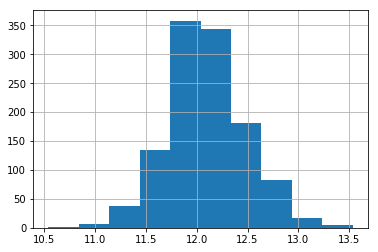

In [13]:
# Check log transform - looks good
train['SalePrice'].apply(np.log).hist()
# Execute log transform
train['SalePrice'] = train['SalePrice'].apply(np.log)
valid['SalePrice'] = valid['SalePrice'].apply(np.log)

In [14]:
print(train.loc[0:3, 'SalePrice'])

0    12.247694
1    12.109011
2    12.317167
Name: SalePrice, dtype: float64


In [15]:
# Define model with grid search function

def glm_grid(X, y, train, valid):
    
    """ Wrapper function for penalized GLM with alpha and lambda search.
    
    :param X: List of inputs.
    :param y: Name of target variable.
    :param train: Name of training H2OFrame.
    :param valid: Name of validation H2OFrame.
    :return: Best H2Omodel from H2OGeneralizedLinearEstimator

    """
    
    alpha_opts = [0.01, 0.25, 0.5, 0.75, 0.99] # always keep some L2
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(
            family="gaussian",
            lambda_search=True,
            seed=12345),
        hyper_params=hyper_parameters)
    
    # train grid
    grid.train(y=y,
               x=X, 
               training_frame=train,
               validation_frame=valid)

    # show grid search results
    print(grid.show())

    best = grid.get_grid()[0]
    print(best)
    
    # plot top frame values
    yhat_frame = valid.cbind(best.predict(valid))
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')
    
    # select best model
    return best

In [16]:
# Function to generate submission file

import re
import time

def gen_submission(model, test=test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param model: Model with which to score test data.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(model.predict(test).exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = 'data/submission_' + str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)

In [17]:
cols=train.columns
train = h2o.H2OFrame(train.as_matrix())
train.columns = list(cols)
print(train[0:3,:])

Parse progress: |█████████████████████████████████████████████████████████| 100%


Id,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NoApp,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoApp,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoApp,MiscFeature_Gar2,MiscFeature_NoApp,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,65,8450,1,4,1,7,5,2003,2003,196,4,3,4,3,1,6,706,1,0,150,856,5,1,856,854,0,1710,1,0,2,1,3,1,4,8,5,0,0,3,2,2,548,3,3,3,0,61,0,0,0,0,0,0,2,2008,12.2477,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [18]:
cols=valid.columns
valid = h2o.H2OFrame(valid.as_matrix())
valid.columns = list(cols)

cols=test.columns
test = h2o.H2OFrame(test.as_matrix())
test.columns = list(cols)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                    model_ids  \
0    [0.99]  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_4   
1    [0.25]  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_1   
2    [0.75]  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_3   
3     [0.5]  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_2   
4    [0.01]  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_0   

    residual_deviance  
0   7.188858704071223  
1   7.191455399183768  
2   7.194395439603479  
3  7.2000965336032205  
4   7.849842979869426  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_1_sid_9871_model_python_1530324903060_1_model_4


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.010445804728205934
RMSE: 0.10220471969633269
MAE: 0.07139058816295306
RMSLE: 0.0078515023574848

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-06-29 22:15:13,0.000 sec,1,.31E0,1,0.1458596,0.2355589
,2018-06-29 22:15:13,0.010 sec,2,.3E0,2,0.1372600,0.2223869
,2018-06-29 22:15:13,0.010 sec,3,.29E0,2,0.1294210,0.2103190
,2018-06-29 22:15:13,0.010 sec,4,.27E0,2,0.1222756,0.1992605
,2018-06-29 22:15:13,0.010 sec,5,.26E0,2,0.1157625,0.1891248
---,---,---,---,---,---,---,---
,2018-06-29 22:15:13,0.391 sec,90,.5E-2,71,0.0103523,0.0246493
,2018-06-29 22:15:13,0.397 sec,91,.48E-2,72,0.0102646,0.0247259
,2018-06-29 22:15:13,0.400 sec,92,.46E-2,72,0.0101832,0.0248228
,2018-06-29 22:15:13,0.405 sec,93,.44E-2,75,0.0101062,0.0249347



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.1102
11.4076,11.5126
11.9767,11.9137
11.8451,11.7635
11.9447,11.9233
11.8115,11.796
11.1346,11.27
10.5966,11.53
11.3145,11.2929
11.7772,11.792


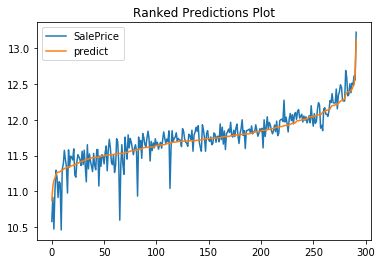

In [19]:
glm = glm_grid(cols.drop('Id'), 'SalePrice', train, valid)

In [20]:
gen_submission(glm,test=test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [21]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
H2O session _sid_9871 closed.
